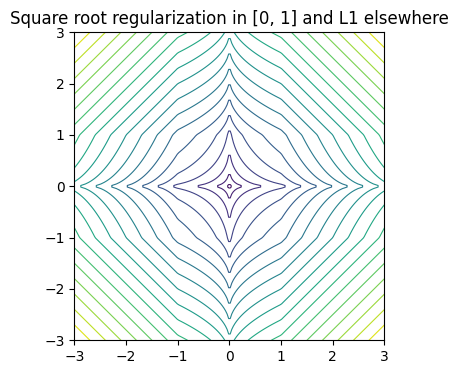

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

def sqrt(vector, scale=1.0):
    '''Square root penalty in [0, 1] and L1 elsewhere'''
    l1 = torch.abs(vector)
    mask = l1 < 1
    loss = (l1.sqrt() * mask) + (l1 * ~mask)
    return loss.sum() * scale

# Create a meshgrid for the input ranges [-3, 3] for both x and y
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# Calculate Z for each (x, y) pair using the updated function
Z = np.empty_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vector = torch.tensor([X[i, j], Y[i, j]], dtype=torch.float32)
        Z[i, j] = sqrt(vector).numpy()

fig_1, ax = plt.subplots(figsize=(4, 4))
ax.contour(X, Y, Z, 20, cmap='viridis', linewidths=0.8)
ax.set_title('Square root regularization in [0, 1] and L1 elsewhere')
fig_1.show()

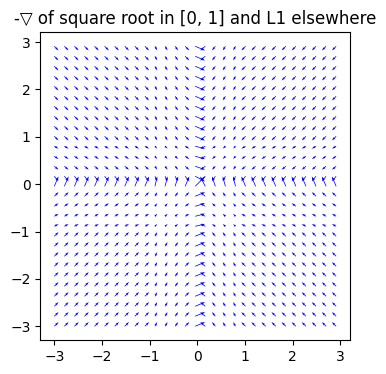

In [33]:
# Function to compute the gradient of the square root penalty function
def gradient_sqrt_penalty(x, y):
    vector = torch.tensor([x, y], dtype=torch.float32)
    vector.requires_grad_(True)
    
    loss = sqrt(vector)
    loss.backward()
    
    return vector.grad.numpy()

# Compute the gradient at each point in the grid
grad_x = np.zeros_like(X)
grad_y = np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        grad = gradient_sqrt_penalty(X[i, j], Y[i, j])
        grad_x[i, j], grad_y[i, j] = - grad

# Plotting the gradient using contour lines made of short blue arrows
skip = 7  # Skip every n points to reduce arrow density
fig_2, ax = plt.subplots(figsize=(4, 4))
ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], grad_x[::skip, ::skip], grad_y[::skip, ::skip], color='blue', linewidths=0.8)
ax.set_title('-▽ of square root in [0, 1] and L1 elsewhere')
fig_2.show()

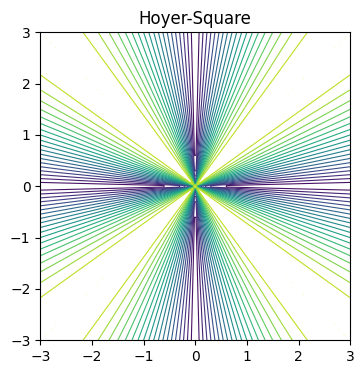

In [35]:
def hoyer_square(vector, scale=1.0, dim=-1):
    eps = torch.finfo(vector.dtype).eps

    numer = vector.norm(p=1, dim=dim)
    denom = vector.norm(p=2, dim=dim)
    return numer.div(denom + eps).square().sum() * scale

# Create a meshgrid for the input ranges [-3, 3] for both x and y
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# Calculate Z for each (x, y) pair using the updated function
Z = np.empty_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vector = torch.tensor([X[i, j], Y[i, j]], dtype=torch.float32)
        Z[i, j] = hoyer_square(vector).numpy()

fig_3, ax = plt.subplots(figsize=(4, 4))
ax.contour(X, Y, Z, 20, cmap='viridis', linewidths=0.8)
ax.set_title('Hoyer-Square')
fig_3.show()

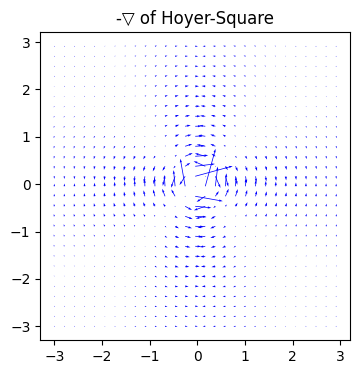

In [51]:
# Function to compute the gradient of the square root penalty function
def gradient_hoyer_square_penalty(x, y):
    vector = torch.tensor([x, y], dtype=torch.float32)
    vector.requires_grad_(True)
    
    loss = hoyer_square(vector)
    loss.backward()
    
    return vector.grad.numpy()

# Compute the gradient at each point in the grid
grad_x = np.zeros_like(X)
grad_y = np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        grad = gradient_hoyer_square_penalty(X[i, j], Y[i, j])
        grad_x[i, j], grad_y[i, j] = - grad

skip = 7  # Skip every n points to reduce arrow density
fig_4, ax = plt.subplots(figsize=(4, 4))
# Scaled to reduce the arrow overlaps near 0 somewhat.
ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], grad_x[::skip, ::skip], grad_y[::skip, ::skip], color='blue', linewidths=0.8, scale=80)
ax.set_title('-▽ of Hoyer-Square')
fig_4.show()